In [ ]:
###importo le librerie che utilizzerò

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
from operator import itemgetter


In [ ]:
##trovo il percorso del file

In [7]:
bgg = 'bgg.cvs/bgg.csv'

In [8]:
class Board_game(object):
    """
    An analytical wrapper that manages access to the data and wraps various
    statistical functions for easy and quick evaluation.
    """

    def __init__(self, path=bgg, m=6.3, C=30):
        self.path  = path
        self.prior = m
        self.confidence = C
        self.load()
                

    def load(self):
        """
        Load data from disk into a DataFrame.
        """
        self.data = pd.read_csv(self.path)

    @property
    def games(self):
        """
        Returns the data grouped by Games
        """
        return self.data.groupby(['game', 'title'])

    def get_means(self):
        return self.games['rating'].mean()

    def get_counts(self):
        return self.games['game'].count()

    def describe(self):
        return self.data.describe()

    def __str__(self):
        return str(self.data.head())
    
    def plot_mean_frequency(self):
        grid   = pd.DataFrame({
                    'Mean Rating':  self.games['rating'].mean(),
                    'Number of Reviewers': self.games['rating'].count()
                 })
        grid.plot(x='Number of Reviewers', y='Mean Rating', kind='hexbin',
                  xscale='log', cmap='YlGnBu', gridsize=12, mincnt=1,
                  title="Ratings by Simple Mean")
        plt.show()
    
    def bayesian_mean(self, arr):
        if not self.prior or not self.confidence:
            raise TypeError("Bayesian mean must be computed with m and C")

        return ((self.confidence * self.prior + arr.sum()) /
                (self.confidence + arr.count()))
    
    def get_bayesian_estimates(self):
        return self.games['rating'].agg(self.bayesian_mean)
    

    def top_games(self, n=20):
        table   = pd.DataFrame({
                    'mean':  self.get_means(),
                    'count': self.get_counts(),
                    'bayes': self.get_bayesian_estimates()
                 })
        return table.sort_values('bayes', ascending = False)[:n]


                                                     mean  count     bayes
game   title                                                              
261393 Dungeon Universalis                       9.666329    100  8.739817
228370 TerroriXico                               9.930233     46  8.438356
240271 Core Space                                9.143421    100  8.338679
259061 Skytear                                   9.194203    100  8.317172
245240 Goblin Grapple                            8.882955    100  8.226271
266507 Clank! Legacy: Acquisitions Incorporated  9.009954    100  8.212909
115746 War of the Ring: Second Edition           8.921622    100  8.165385
209877 World At War 85: Storming the Gap         9.344681     70  8.158442
194923 Techno Bowl: Arcade Football Unplugged    8.826625    100  8.137545
284111 Drinks & Daggers                          9.311111     48  8.106667
258148 Power Rangers: Heroes of the Grid         8.835616    100  8.097087
219217 Arena: The Contest

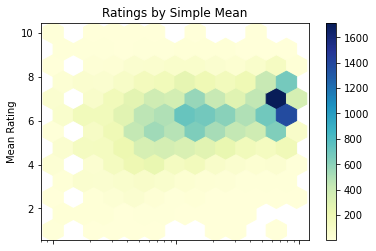

None


In [9]:
ratings = Board_game()
print (ratings.top_games())
print (ratings.plot_mean_frequency())

In [ ]:
#utilizzando pandas e il suo metodo di lettura csv lo inserisco in un DataFrame

In [7]:
df = pd.read_csv(bbg)

In [8]:
df

,game,title,rating
0,25984,Trivial Pursuit: Genus IV – Canadian Edition,3.0
1,25984,Trivial Pursuit: Genus IV – Canadian Edition,5.0
2,25984,Trivial Pursuit: Genus IV – Canadian Edition,3.0
3,25984,Trivial Pursuit: Genus IV – Canadian Edition,7.0
4,25984,Trivial Pursuit: Genus IV – Canadian Edition,6.0
...,...,...,...
1082162,11906,Source of the Nile: Tributary,5.0
1082163,11906,Source of the Nile: Tributary,NaN
1082164,11906,Source of the Nile: Tributary,NaN
1082165,11906,Source of the Nile: Tributary,NaN


In [ ]:
df.dtypes

In [ ]:
df.info()

In [ ]:
df.head()

In [ ]:
df['rating'].describe().apply("{0:.5f}".format)

In [ ]:
df['rating'].nunique()

In [ ]:
df.isna().any()

In [ ]:
#sum([True for idx,row in df.iterrows() if any(row.isnull())])

In [ ]:
fig, ax = plt.subplots(figsize=(16, 6),nrows=1, ncols=2)
df[['rating']].boxplot(ax=ax[0])
df['rating'].plot.kde(ax=ax[1])
plt.show()
    


In [ ]:
## Nuovo DataFrame con la media aritmetica dei voti per ciascun gioco messi in ordine 

In [ ]:
df_mean_ranking = df.groupby(['game', 'title']).agg(mean_rating=('rating', 'mean')).sort_values('mean_rating', ascending= False)[:20]

In [ ]:
df_mean_ranking

In [ ]:
## Dataframe con il commentati per gioco

In [ ]:
df_comment_ranking = df.groupby(['game', 'title']).agg(comment_count=('game', 'count')).sort_values('comment_count', ascending= False)

In [ ]:
df_comment_ranking

In [ ]:
## Dataframe con entrambi i commenti e rating

In [ ]:
df_global = df.groupby(['game', 'title']).agg(mean_rating=('rating', 'mean'), comment_count=('game', 'count')).sort_values('mean_rating', ascending= False)



In [ ]:
df_global

In [ ]:
## grafico per vedere i commenti

In [ ]:
fig, ax = plt.subplots(figsize=(16, 6),nrows=1, ncols=2)
df_global[['comment_count']].hist(ax=ax[0])
df_global[['mean_rating']].hist(ax=ax[1])
plt.show()

In [ ]:
##dataframe senza na